In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn.cluster.bicluster import SpectralBiclustering

In [18]:
def plot_timeseries(data,district,targets=['SPEI','drought']):
    data[data.district==district].set_index('date')[targets].plot(marker='.');
    plt.title(district);
    return

In [125]:
def plot_timeseries_v2(data,bycol,val,targets=['SPEI','drought']):
    data[data[bycol]==val].set_index('date')[targets].plot(marker='.');
    plt.title(bycol+': '+str(val));
    return

In [3]:
def create_lag_features(data,target,month_lag,aggregator='mean'):
    new_data = pd.DataFrame()
    for district in data.district.unique():
        select_data = data[data.district==district].copy()
        lag_data = select_data[['date',target]].copy()
        for lag in range(1,month_lag):
            temp=select_data.shift(lag)[target]
            lag_data = lag_data.merge(temp,left_index=True,right_index=True)
        col_name = aggregator+'_'+target+'_lag='+str(month_lag)
        if aggregator=='mean':
            lag_data[col_name] = lag_data.mean(axis=1)
        if aggregator=='min':
            lag_data[col_name] = lag_data.min(axis=1)
        #lag_data = lag_data[[col_name]]
        new_select_data = select_data.merge(lag_data[[col_name]],how='outer',left_index=True,right_index=True)
        new_data = pd.concat([new_data,new_select_data])
    return (new_data)

In [4]:
def plot_dist(data,target,drought_var):
    plt.figure()
    plt.subplot(1,2,1)
    sns.boxenplot(y=target,x=drought_var,data=data)
    plt.subplot(1,2,2)
    bins = np.arange(data[target].min(),data[target].max(),0.05*(data[target].max()-data[target].min()))
    ax=sns.distplot((data[(data[drought_var].notna())&(data[drought_var]==False)][target]).dropna()
                 ,bins=bins,label='False')
    sns.distplot(data[(data[drought_var].notna())&(data[drought_var]==True)][target].dropna(),
                bins=bins,label='True')
    ax.yaxis.set_label_position("right")
    plt.ylabel('distribution')
    ax.yaxis.tick_right()
    plt.legend(loc="best")
    return

In [5]:
path = './'
filename = 'UG_Droughts_merged_data.csv'
data = pd.read_csv(path+filename,low_memory=False)
data.date = pd.to_datetime(data.date,infer_datetime_format=True)
#data.drought = data.drought.astype('bool').astype('int')

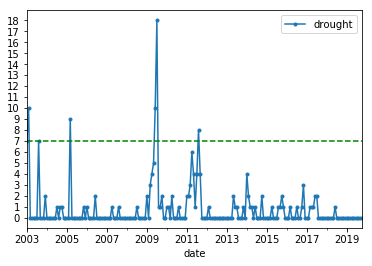

In [6]:
threshold = 7.0
drought_by_date = data[['date', 'drought']].dropna().groupby('date').sum()
drought_by_date.dropna(inplace=True)
ax=drought_by_date.plot(linestyle='-', marker='.')
plt.xlim([date(2003,1,1),date(2019,10,1)])
plt.yticks(range(19));
ax.axhline(threshold,ls='--',color='g');

In [7]:
big_droughts = list(drought_by_date[drought_by_date.drought>threshold].index)
data['big_droughts'] = data.apply(lambda x: (x['date'] in big_droughts)and(x['drought']),axis=1)
data.head()

district       date drought country  Longitude_E  Latitude_N      SPEI  \
0   KWANIA 2003-01-01   False  Uganda      32.7633      1.9033 -0.157246   
1   KWANIA 2003-02-01   False  Uganda      32.7633      1.9033 -1.487795   
2   KWANIA 2003-03-01   False  Uganda      32.7633      1.9033 -0.732534   
3   KWANIA 2003-04-01   False  Uganda      32.7633      1.9033  0.010030   
4   KWANIA 2003-05-01   False  Uganda      32.7633      1.9033  0.136625   

  geometry_pos  surface_moisture_profile  surface_soil_moisture  \
0          NaN                       NaN                    NaN   
1          NaN                       NaN                    NaN   
2          NaN                       NaN                    NaN   
3          NaN                       NaN                    NaN   
4          NaN                       NaN                    NaN   

   subsurface_soil_moisture  surface_temperature_daytime  \
0                       NaN                          NaN   
1                       NaN                          NaN   
2                       NaN                          NaN   
3                       NaN                          NaN   
4                       NaN                          NaN   

   surface_temperature_nighttime  NDVI  rainfall  drought_any big_droughts  
0                            NaN   NaN       NaN        False        False  
1                            NaN   NaN       NaN        False        False  
2                            NaN   NaN       NaN        False        False  
3                            NaN   NaN       NaN        False        False  
4                            NaN   NaN       NaN        False        False

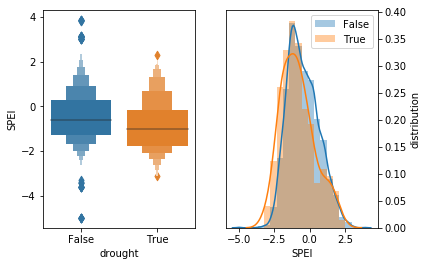

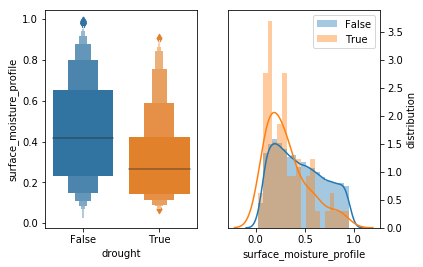

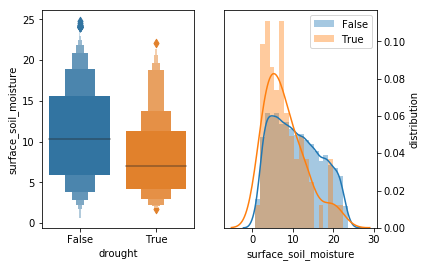

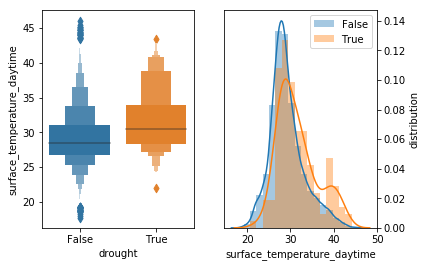

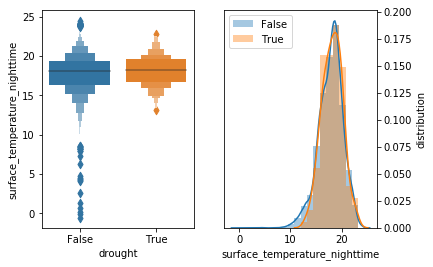

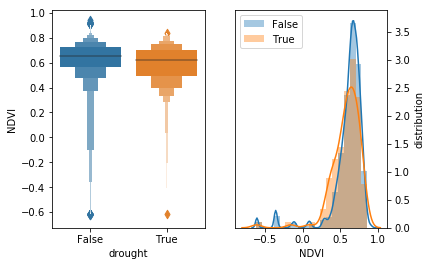

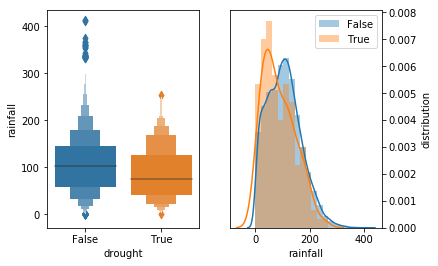

In [8]:
targets=['SPEI','surface_moisture_profile','surface_soil_moisture',
        'surface_temperature_daytime','surface_temperature_nighttime',
        'NDVI','rainfall']
drought_var = 'drought'

for target in targets:
    plot_dist(data,target,drought_var)


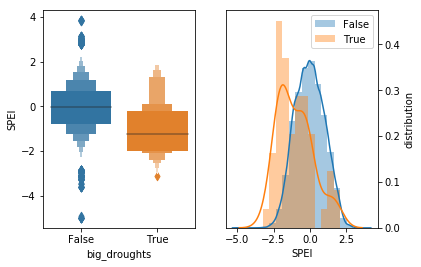

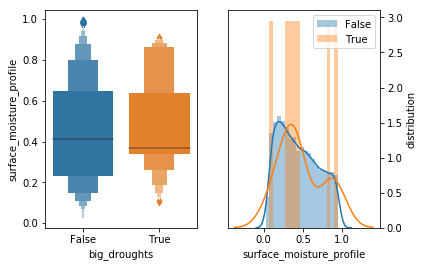

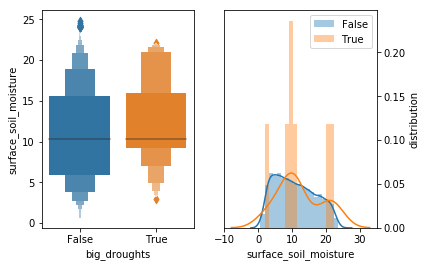

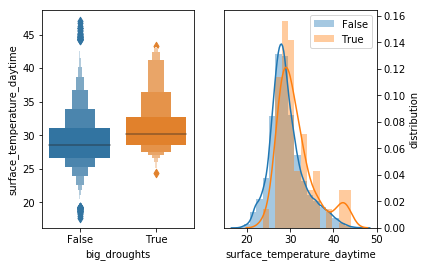

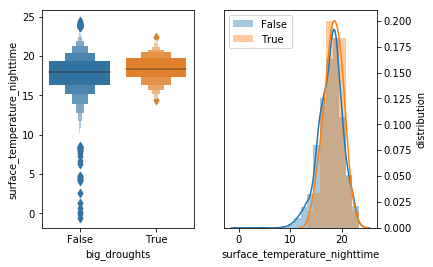

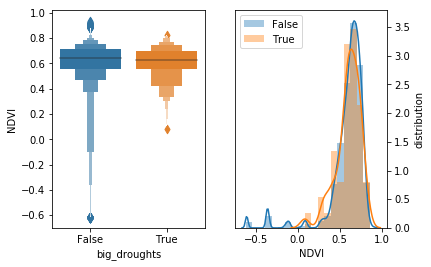

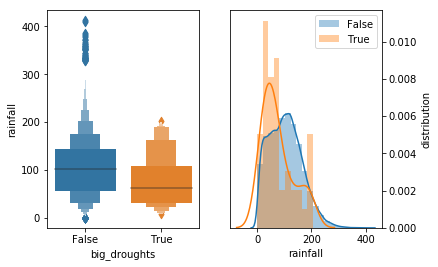

In [9]:
drought_var = 'big_droughts'

for target in targets:
    plot_dist(data,target,drought_var)


In [114]:
drought_spei = data[['district','date','SPEI','drought']].dropna().copy()
drought_spei.drought = drought_spei.drought.astype('int')
droughts = drought_spei.pivot(index='date', columns='district', values='drought')
#spei = drought_spei.pivot(index='date', columns='district', values='SPEI')

In [12]:
districts_with_droughts = list(droughts.columns[droughts.sum()>0])

In [13]:
#print(districts_with_droughts)
print('Drought reported in '+str(len(districts_with_droughts))+' districts')

Drought reported in 64 districts


In [14]:
# drought_spei_lagged = drought_spei.copy()
# drought_spei_lagged = drought_spei_lagged[drought_spei_lagged.district.apply(lambda x: x in districts_with_droughts)]
# for lag in range(1,12):
#     drought_spei_lagged= create_lag_features(data=drought_spei_lagged,
#                     target='SPEI',month_lag=lag,aggregator='mean')
#drought_spei_lagged.head()

<Figure size 432x288 with 0 Axes>

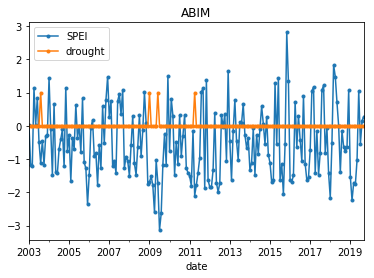

<Figure size 432x288 with 0 Axes>

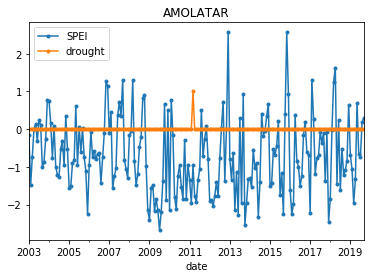

<Figure size 432x288 with 0 Axes>

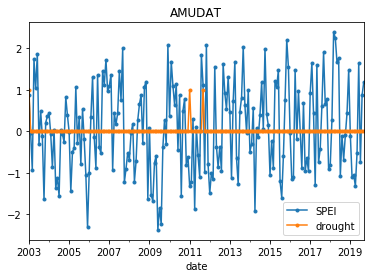

<Figure size 432x288 with 0 Axes>

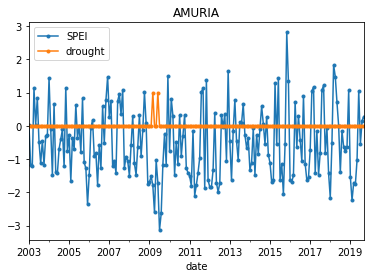

<Figure size 432x288 with 0 Axes>

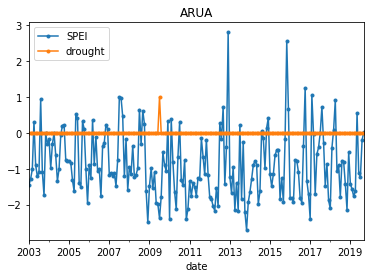

<Figure size 432x288 with 0 Axes>

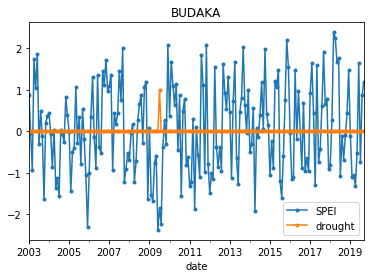

<Figure size 432x288 with 0 Axes>

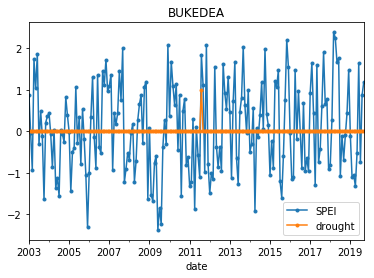

<Figure size 432x288 with 0 Axes>

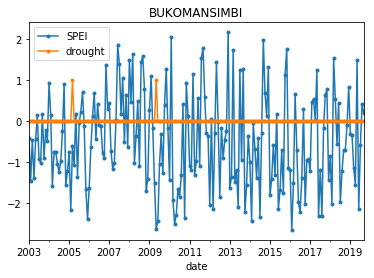

<Figure size 432x288 with 0 Axes>

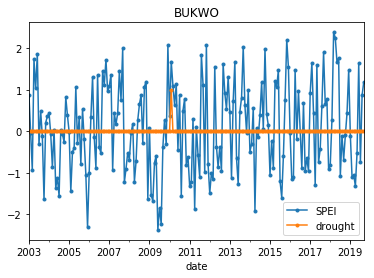

<Figure size 432x288 with 0 Axes>

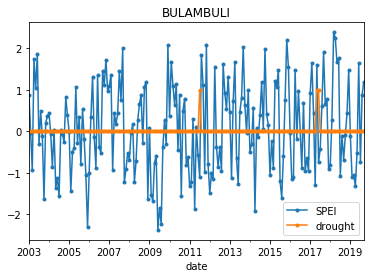

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

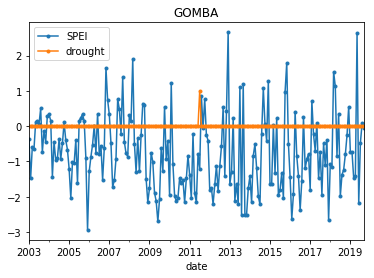

<Figure size 432x288 with 0 Axes>

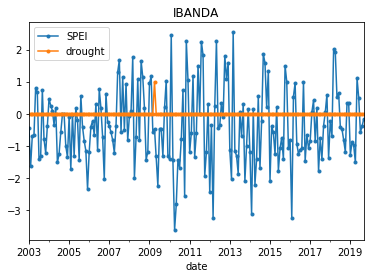

<Figure size 432x288 with 0 Axes>

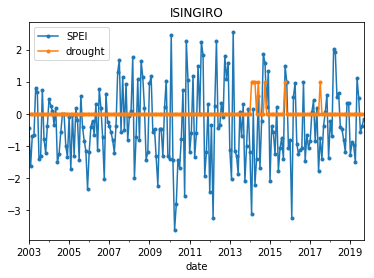

<Figure size 432x288 with 0 Axes>

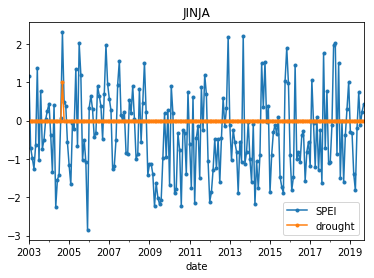

<Figure size 432x288 with 0 Axes>

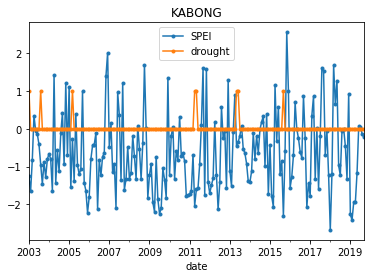

<Figure size 432x288 with 0 Axes>

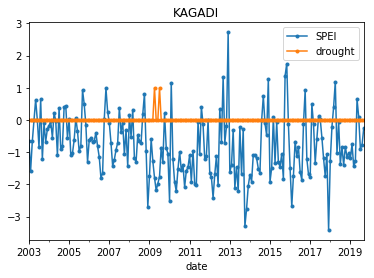

<Figure size 432x288 with 0 Axes>

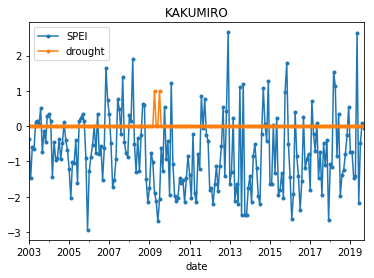

<Figure size 432x288 with 0 Axes>

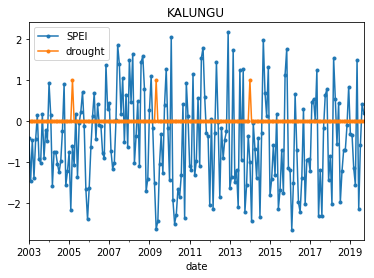

<Figure size 432x288 with 0 Axes>

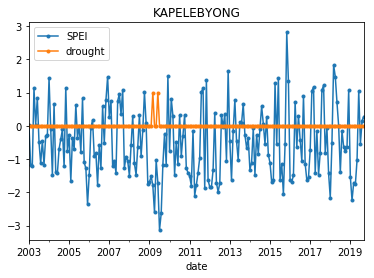

<Figure size 432x288 with 0 Axes>

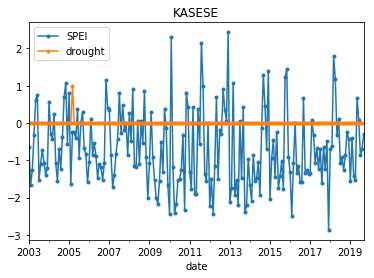

<Figure size 432x288 with 0 Axes>

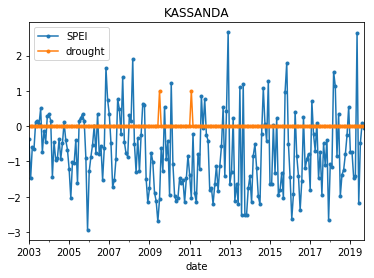

<Figure size 432x288 with 0 Axes>

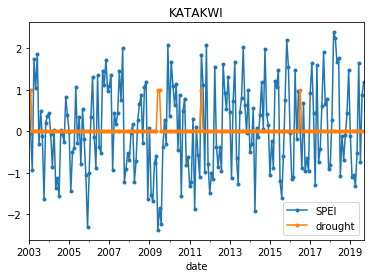

<Figure size 432x288 with 0 Axes>

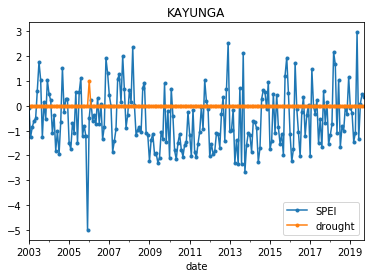

<Figure size 432x288 with 0 Axes>

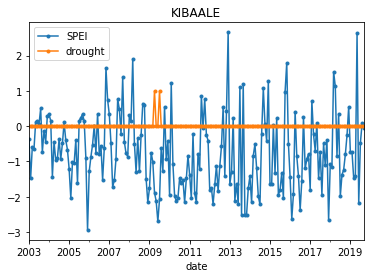

<Figure size 432x288 with 0 Axes>

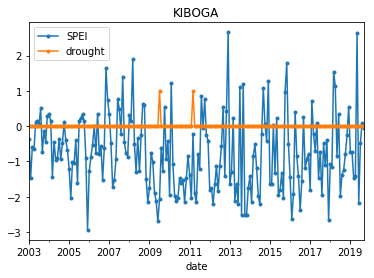

<Figure size 432x288 with 0 Axes>

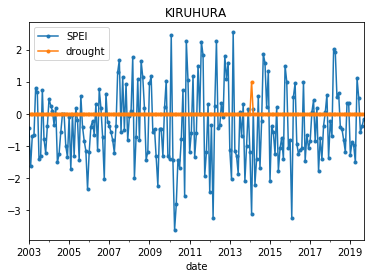

<Figure size 432x288 with 0 Axes>

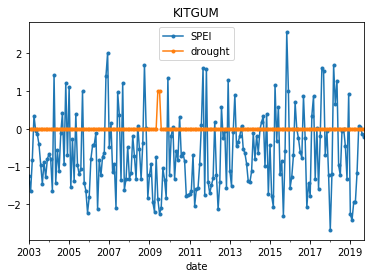

<Figure size 432x288 with 0 Axes>

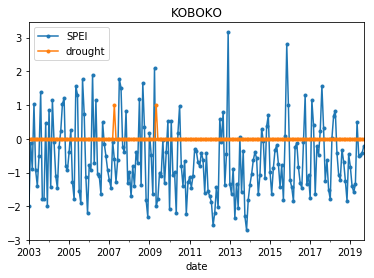

<Figure size 432x288 with 0 Axes>

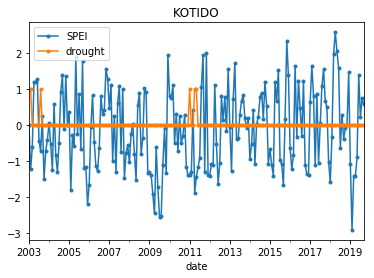

<Figure size 432x288 with 0 Axes>

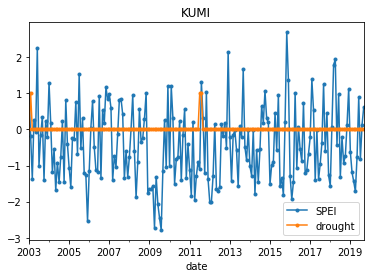

<Figure size 432x288 with 0 Axes>

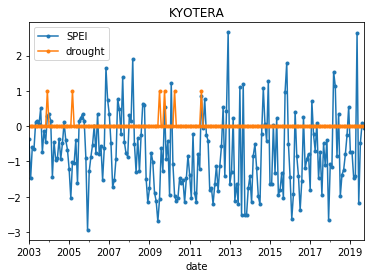

<Figure size 432x288 with 0 Axes>

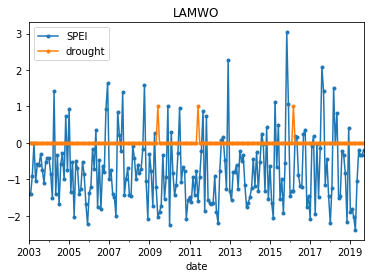

<Figure size 432x288 with 0 Axes>

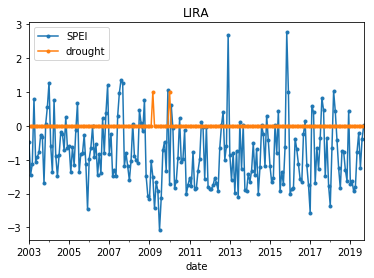

<Figure size 432x288 with 0 Axes>

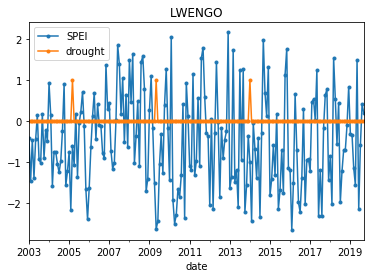

<Figure size 432x288 with 0 Axes>

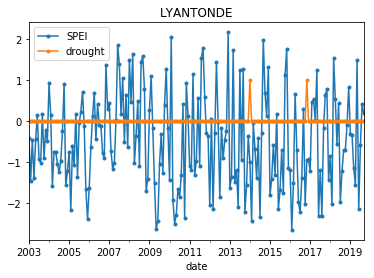

<Figure size 432x288 with 0 Axes>

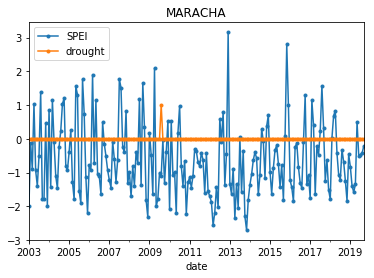

<Figure size 432x288 with 0 Axes>

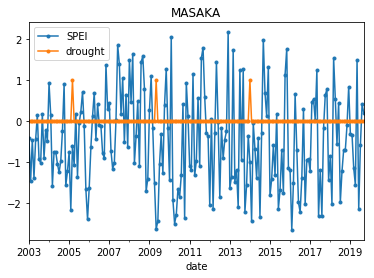

<Figure size 432x288 with 0 Axes>

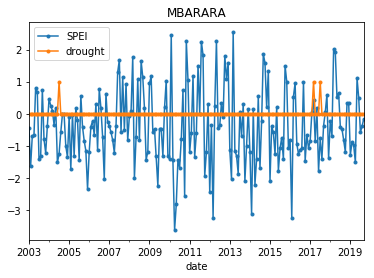

<Figure size 432x288 with 0 Axes>

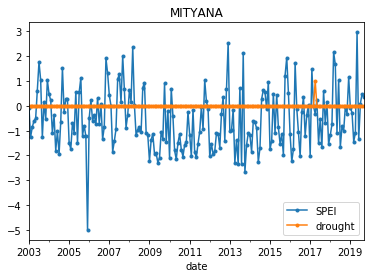

<Figure size 432x288 with 0 Axes>

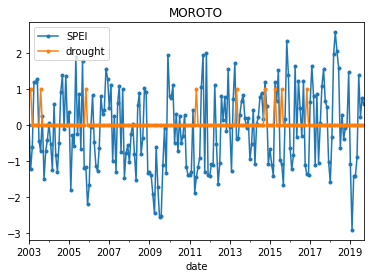

<Figure size 432x288 with 0 Axes>

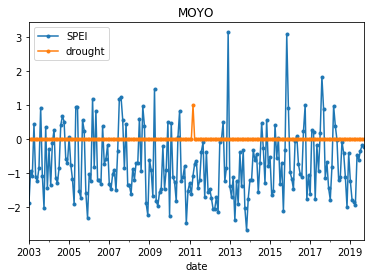

<Figure size 432x288 with 0 Axes>

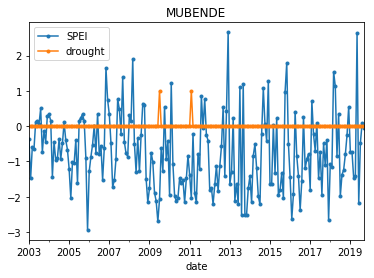

<Figure size 432x288 with 0 Axes>

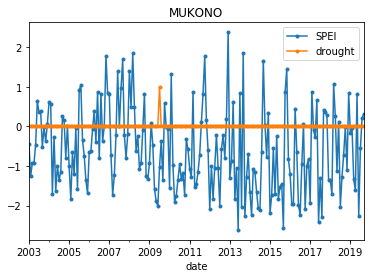

<Figure size 432x288 with 0 Axes>

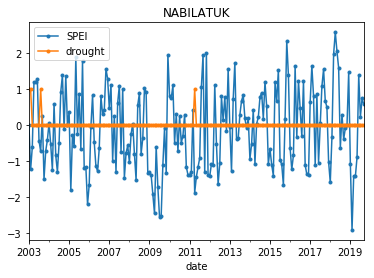

<Figure size 432x288 with 0 Axes>

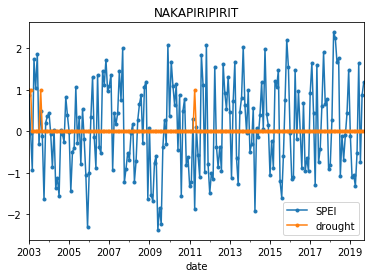

<Figure size 432x288 with 0 Axes>

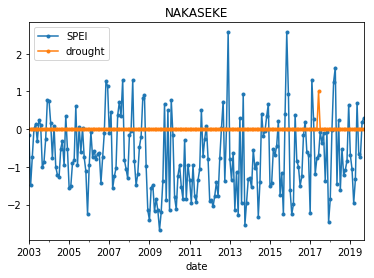

<Figure size 432x288 with 0 Axes>

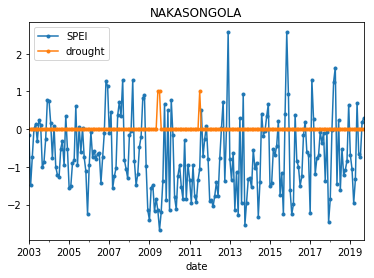

<Figure size 432x288 with 0 Axes>

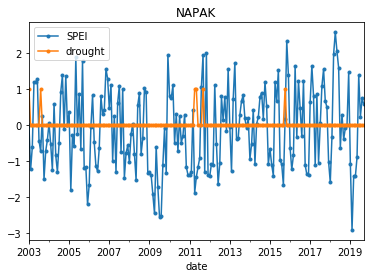

<Figure size 432x288 with 0 Axes>

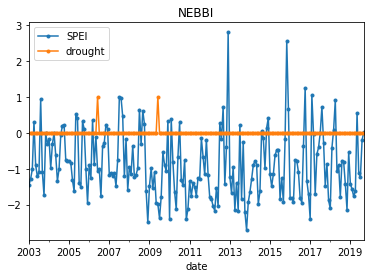

<Figure size 432x288 with 0 Axes>

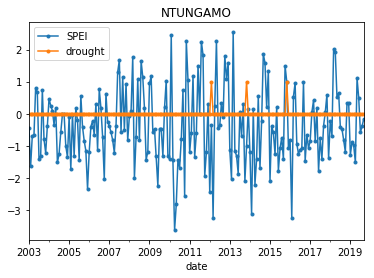

<Figure size 432x288 with 0 Axes>

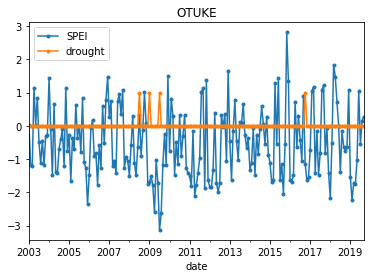

<Figure size 432x288 with 0 Axes>

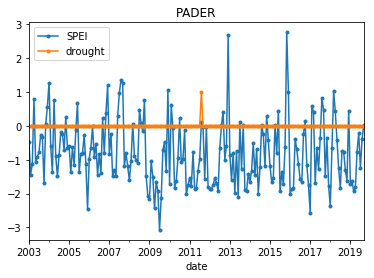

<Figure size 432x288 with 0 Axes>

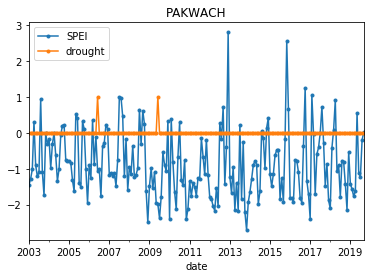

<Figure size 432x288 with 0 Axes>

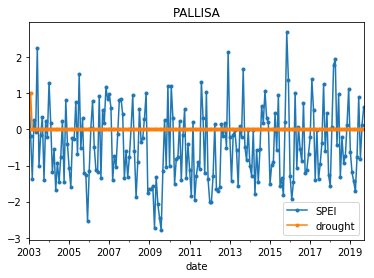

<Figure size 432x288 with 0 Axes>

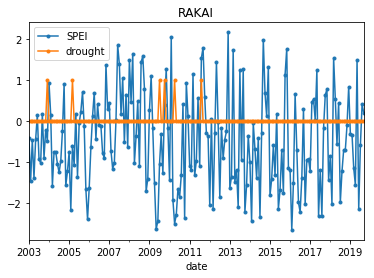

<Figure size 432x288 with 0 Axes>

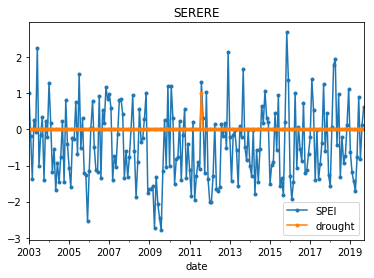

<Figure size 432x288 with 0 Axes>

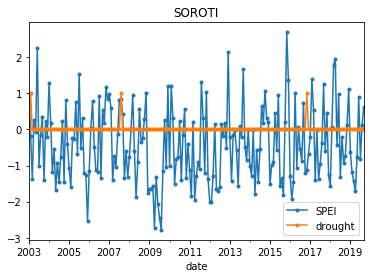

<Figure size 432x288 with 0 Axes>

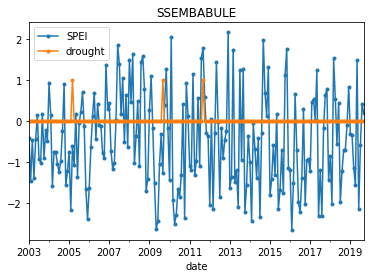

<Figure size 432x288 with 0 Axes>

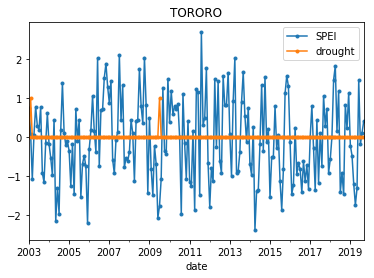

<Figure size 432x288 with 0 Axes>

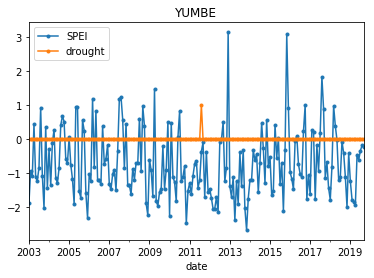

<Figure size 432x288 with 0 Axes>

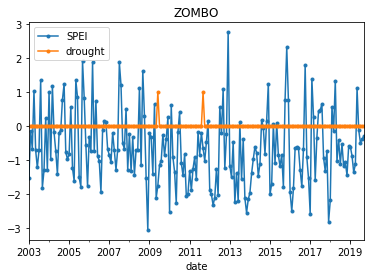

In [19]:
for district in districts_with_droughts:
    plt.figure();
    plot_timeseries(drought_spei,
                    district=district,targets=['SPEI', 'drought']);
    

In [37]:
spei = data[['district','date','SPEI']].dropna().pivot(index='date',columns='district',
                                      values='SPEI')

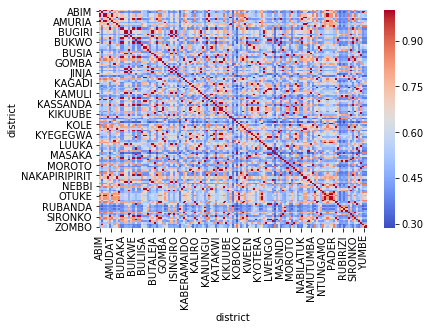

In [38]:
spei_corr = spei.corr()
sns.heatmap(spei_corr,cmap='coolwarm')

In [86]:
model = SpectralBiclustering(n_clusters=25, method='log',
                             random_state=0)
model.fit(spei_corr)
spei_corr_sorted = spei_corr.values[np.argsort(model.row_labels_),:]
spei_corr_sorted = spei_corr_sorted[:, np.argsort(model.column_labels_)]
rows = spei_corr.columns[np.argsort(model.row_labels_)]
cols = spei_corr.columns[np.argsort(model.column_labels_)]
spei_corr_sorted = pd.DataFrame(spei_corr_sorted,index=rows,columns=cols)

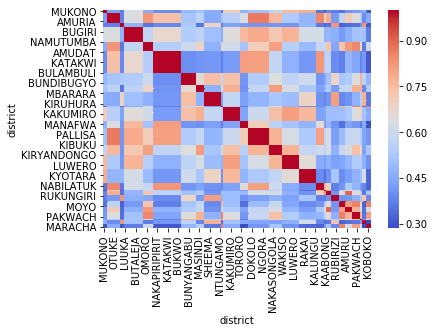

In [87]:
sns.heatmap(spei_corr_sorted,cmap='coolwarm')

In [116]:
district_groups = pd.DataFrame()
district_groups['group'] = model.row_labels_
district_groups['district'] = spei_corr.columns
district_groups.sort_values('group',inplace=True)
district_groups.reset_index(inplace=True,drop=True)
district_groups.head()

group   district
0      0     MUKONO
1      0  KALANGALA
2      1       ABIM
3      1      AGAGO
4      1   ALEBTONG

In [117]:
drought_spei = drought_spei.merge(district_groups,on='district')

In [145]:
drought_spei_grouped = drought_spei.groupby(['date','group']).agg({'drought':np.sum,'SPEI': np.mean})
drought_spei_grouped = drought_spei_grouped.reset_index().sort_values('group')
drought_spei_grouped.rename(columns={'drought':'drought_count'},inplace=True)
drought_spei_grouped['drought'] = drought_spei_grouped['drought_count']>0
drought_spei_grouped.head()

date  group  drought_count      SPEI  drought
0    2003-01-01      0              0 -0.441191    False
1675 2008-08-01      0              0 -0.936315    False
3350 2014-03-01      0              0 -1.067508    False
2300 2010-09-01      0              0 -1.168773    False
2725 2012-02-01      0              0 -1.010573    False

<Figure size 432x288 with 0 Axes>

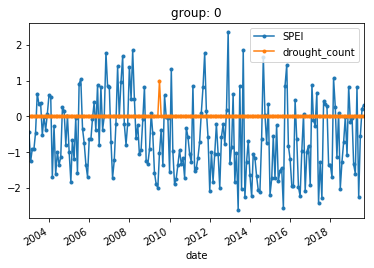

<Figure size 432x288 with 0 Axes>

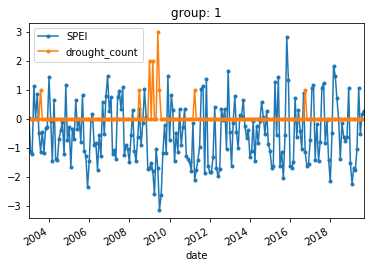

<Figure size 432x288 with 0 Axes>

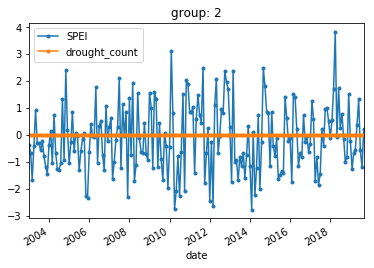

<Figure size 432x288 with 0 Axes>

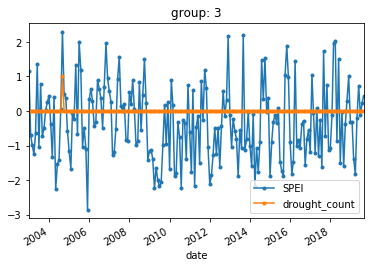

<Figure size 432x288 with 0 Axes>

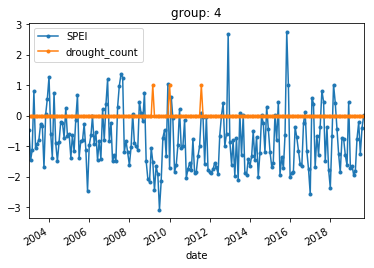

<Figure size 432x288 with 0 Axes>

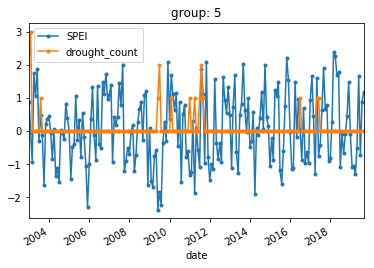

<Figure size 432x288 with 0 Axes>

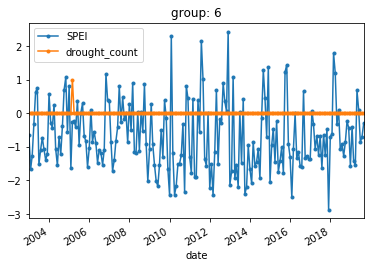

<Figure size 432x288 with 0 Axes>

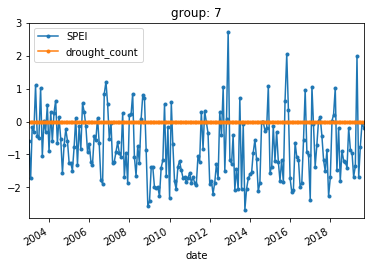

<Figure size 432x288 with 0 Axes>

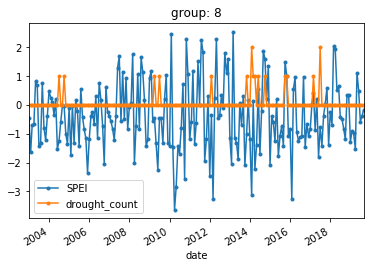

<Figure size 432x288 with 0 Axes>

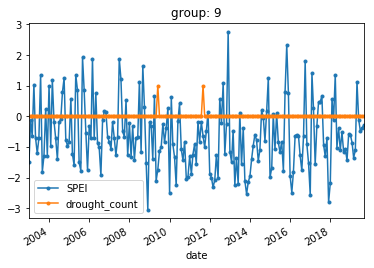

<Figure size 432x288 with 0 Axes>

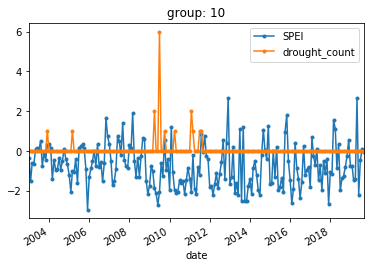

<Figure size 432x288 with 0 Axes>

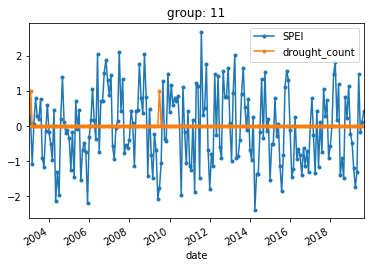

<Figure size 432x288 with 0 Axes>

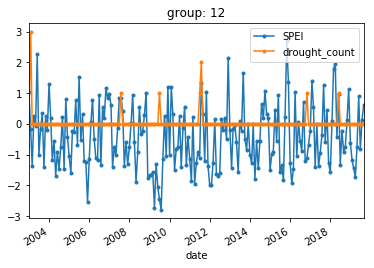

<Figure size 432x288 with 0 Axes>

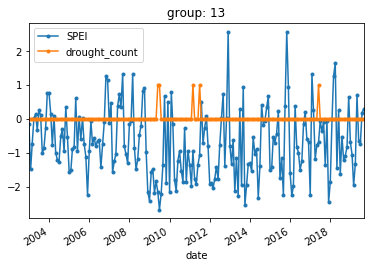

<Figure size 432x288 with 0 Axes>

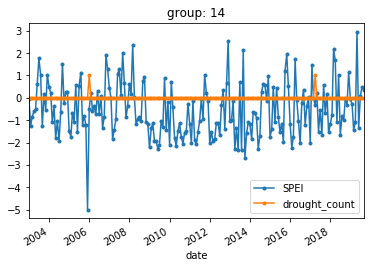

<Figure size 432x288 with 0 Axes>

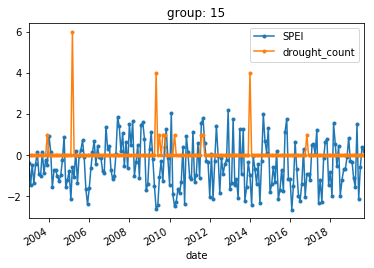

<Figure size 432x288 with 0 Axes>

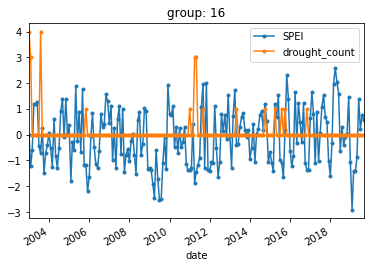

<Figure size 432x288 with 0 Axes>

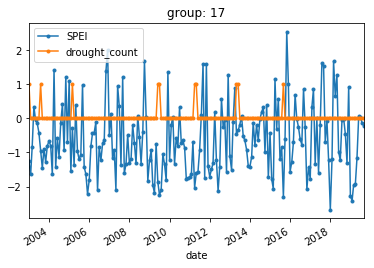

<Figure size 432x288 with 0 Axes>

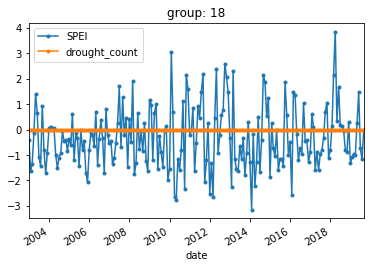

<Figure size 432x288 with 0 Axes>

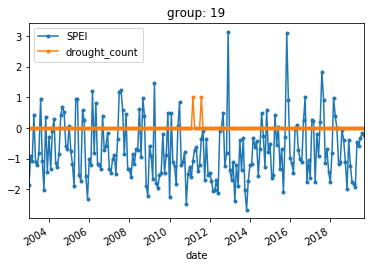

<Figure size 432x288 with 0 Axes>

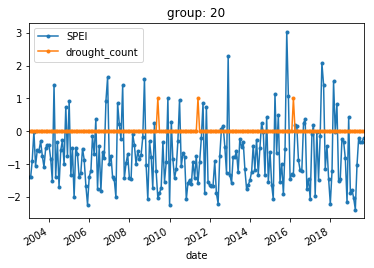

<Figure size 432x288 with 0 Axes>

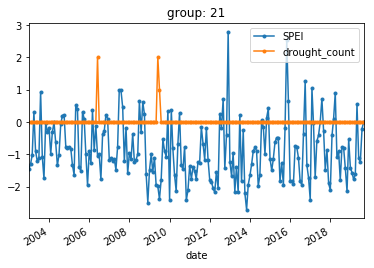

<Figure size 432x288 with 0 Axes>

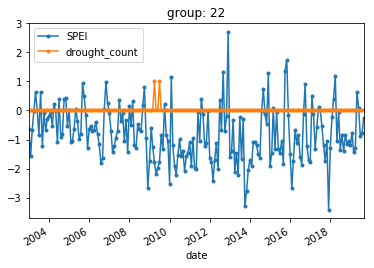

<Figure size 432x288 with 0 Axes>

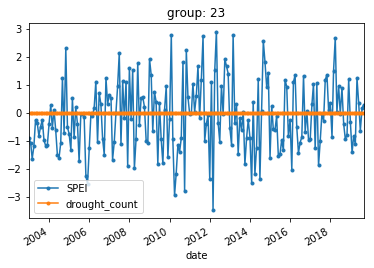

<Figure size 432x288 with 0 Axes>

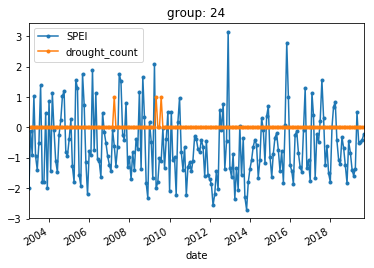

In [146]:
for val in drought_spei_grouped.group.unique():
    plt.figure()
    plot_timeseries_v2(data=drought_spei_grouped
                   ,bycol='group',val=val,targets=['SPEI','drought_count'])

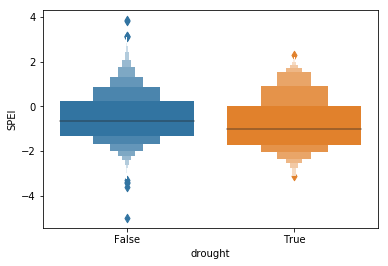

In [148]:
sns.boxenplot(data=drought_spei_grouped,x='drought',y='SPEI')

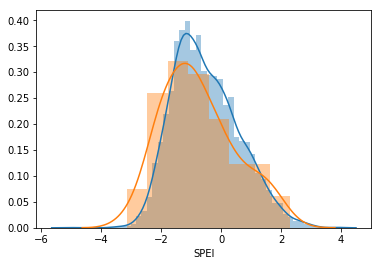

In [151]:
sns.distplot(drought_spei_grouped[drought_spei_grouped.drought==False]['SPEI'])
sns.distplot(drought_spei_grouped[drought_spei_grouped.drought==True]['SPEI'])